In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm as tqdm

In [2]:
articles_df = pd.read_csv('articles_with_sentiment.csv', index_col=0)

In [39]:
count_df = pd.read_csv('count_vectorizer_matrix.csv', index_col=0)

In [40]:
tfidf_df = pd.read_csv('tfidf_sparse_matrix.csv', index_col=0)

In [5]:
earnings_df = pd.read_csv('earnings_reports.csv', index_col=0)
earnings_df.drop_duplicates(inplace=True)

In [6]:
tech_company_tickers = ['AAPL', 'NVDA', 'MSFT', 'AVGO', 'META', 'ORCL', 'CRM', 'AMD', 'UBER', 
                        'ADBE', 'IBM', 'QCOM', 'MU', 'ANET', 'GOOG', 'TSM', 'TSLA', 
                        'NFLX', 'BABA', 'CSCO', 'SONY', 'SHOP', 'PLTR', 'INTU', 'ADP', 
                        'DELL', 'ABNB', 'SPOT', 'PYPL', 'CRWD']
len(tech_company_tickers)

30

In [42]:
key_words = ['esp', 'trailing', 'deliver', 'rank', 'zacks', 'jason',
       'motley', 'galaxy', 'tobereported', 'revision', 'dylan',
       'expense', 'yeah', 'score', 'style', 'efficiency', 'surpassed',
       'opportunity', 'pegged', 'court', 'class', 'fell', 'housing',
       'future', 'filed', 'right', 'debt', 'ukraine', 'biden',
       'plaintiff', 'cramer', 'lawsuit', 'falcon', 'failed', 'crude',
       'russia', 'defendant', 'misleading', 'fear']

len(key_words)

39

In [ ]:
['etfs', 'revisions', 'opportunities', 'futures', 'rights', 'defendants']

In [51]:
# earnings_df.info()
earnings_df['reportedDate'] = pd.to_datetime(earnings_df['reportedDate'])
earnings_df.dropna(inplace=True)
earnings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 0 to 9
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   fiscalDateEnding    278 non-null    object        
 1   reportedDate        278 non-null    datetime64[ns]
 2   reportedEPS         278 non-null    float64       
 3   estimatedEPS        278 non-null    float64       
 4   surprise            278 non-null    float64       
 5   surprisePercentage  278 non-null    float64       
 6   reportTime          278 non-null    object        
 7   ticker              278 non-null    object        
 8   lastDateFormatted   278 non-null    object        
 9   firstDateFormatted  278 non-null    object        
 10  result              278 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 26.1+ KB


In [9]:
earnings_df.shape
# earnings_df[earnings_df['ticker'] == 'ORCL']

(300, 10)

(array([297.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ -1.07 ,  16.502,  34.074,  51.646,  69.218,  86.79 , 104.362,
        121.934, 139.506, 157.078, 174.65 ]),
 <BarContainer object of 10 artists>)

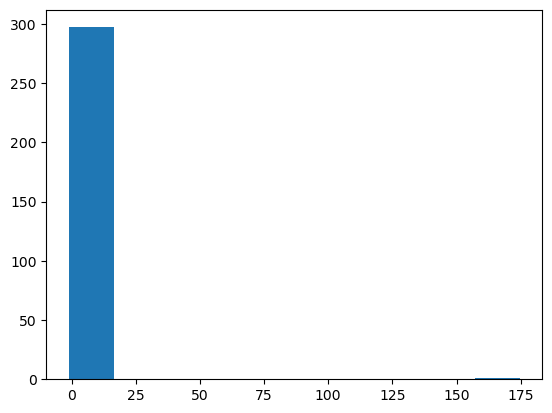

In [10]:
plt.hist(earnings_df['surprise'])

In [11]:
earnings_df = earnings_df[earnings_df['ticker'] != 'SONY']

In [12]:
earnings_df = earnings_df[earnings_df['ticker'] != 'CRM']

In [14]:
earnings_df['result'] = earnings_df['surprise'].apply(lambda x: 1 if x>=0 else 0)

In [15]:
features_counts = earnings_df['result'].value_counts()

In [16]:
sizes = [features_counts[0], features_counts[1]]

Text(0.5, 1.0, '% of Earnings Outperforming')

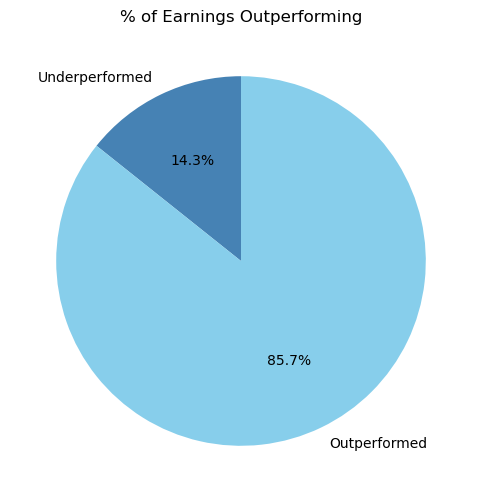

In [28]:
plt.figure(figsize=(6,6))
plt.pie(sizes, labels = ['Underperformed', 'Outperformed'], autopct='%1.1f%%', startangle=90, colors=['#4682b4', 'skyblue'])
plt.title('% of Earnings Outperforming')

Text(0, 0.5, 'Count')

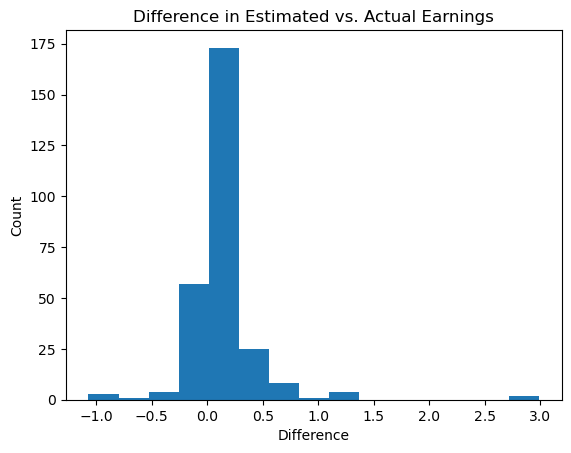

In [13]:
plt.hist(earnings_df['surprise'], bins=15)
plt.title('Difference in Estimated vs. Actual Earnings')
plt.xlabel('Difference')
plt.ylabel('Count')

In [29]:
earnings_df.head(50)
earnings_df.groupby('ticker').count()

,fiscalDateEnding,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage,reportTime,lastDateFormatted,firstDateFormatted,result
ticker,,,,,,,,,,
AAPL,10,10,10,10,10,10,10,10,10,10
ABNB,10,10,10,10,10,10,10,10,10,10
ADBE,10,10,10,10,10,10,10,10,10,10
ADP,10,10,10,10,10,10,10,10,10,10
AMD,10,10,10,10,10,10,10,10,10,10
ANET,10,10,10,10,10,10,10,10,10,10
AVGO,10,10,10,10,10,10,10,10,10,10
BABA,10,10,10,10,10,10,10,10,10,10
CRWD,10,10,10,10,10,10,10,10,10,10


In [30]:
articles_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9604 entries, 0 to 9603
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      9604 non-null   object 
 1   url                        9604 non-null   object 
 2   time_published             9604 non-null   object 
 3   authors                    9604 non-null   object 
 4   source                     9604 non-null   object 
 5   source_domain              9604 non-null   object 
 6   overall_sentiment_score    9604 non-null   float64
 7   overall_sentiment_label    9604 non-null   object 
 8   ticker                     9604 non-null   object 
 9   article                    9604 non-null   object 
 10  overall_cleaned_sentiment  9604 non-null   float64
dtypes: float64(2), object(9)
memory usage: 900.4+ KB


In [31]:
articles_df['time_published'] = pd.to_datetime(articles_df['time_published'])

In [32]:
articles_df['ticker'].unique()

array(['AAPL', 'NVDA', 'MSFT', 'AVGO', 'META', 'ORCL', 'AMD', 'UBER',
       'ADBE', 'IBM', 'QCOM', 'PLTR', 'MU', 'ANET', 'GOOG', 'TSM', 'TSLA',
       'NFLX', 'BABA', 'CSCO', 'SHOP', 'INTU', 'ADP', 'DELL', 'ABNB',
       'SPOT', 'PYPL', 'CRWD'], dtype=object)

In [33]:
articles_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9604 entries, 0 to 9603
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   title                      9604 non-null   object        
 1   url                        9604 non-null   object        
 2   time_published             9604 non-null   datetime64[ns]
 3   authors                    9604 non-null   object        
 4   source                     9604 non-null   object        
 5   source_domain              9604 non-null   object        
 6   overall_sentiment_score    9604 non-null   float64       
 7   overall_sentiment_label    9604 non-null   object        
 8   ticker                     9604 non-null   object        
 9   article                    9604 non-null   object        
 10  overall_cleaned_sentiment  9604 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 900.4+ KB


In [34]:
articles_df = articles_df.sort_values(by=['ticker', 'time_published'])

In [35]:
def hist_ticker_sentiment(articles_df, earnings_df, ticker):
    ticker_articles = articles_df[articles_df['ticker'] == ticker]
    ticker_earnings = earnings_df[earnings_df['ticker'] == ticker]
    dates = ticker_earnings['reportedDate']
    x = 0
    for date in dates:
        surprise = ticker_earnings['surprise'][x]
        first_date = date - pd.Timedelta(days=12)
        cur_df = ticker_articles[(ticker_articles['time_published'] >= first_date) & 
                             (ticker_articles['time_published'] <= date)]
        avg_sentiment = np.mean(cur_df['overall_sentiment_score'])
        plt.hist(cur_df['overall_cleaned_sentiment'])
        plt.title(f'{x}. {date.date()} - avg sentiment: {avg_sentiment}')
        plt.show()
        print(f'Difference in Estimated and Actual Earnings: {surprise}')
        x += 1

In [36]:
def bar_top_words(articles_df, earnings_df, sparse_mat, ticker):
    ticker_articles = articles_df[articles_df['ticker'] == ticker]
    ticker_earnings = earnings_df[earnings_df['ticker'] == ticker]
    dates = ticker_earnings['reportedDate']
#     print(dates)
    x = 0
    return_df = pd.DataFrame(columns=key_words)
    for date in dates:
#         surprise = ticker_earnings['surprise'][x]
        first_date = date - pd.Timedelta(days=12)
        cur_df = ticker_articles[(ticker_articles['time_published'] >= first_date) & 
                                 (ticker_articles['time_published'] <= date)]
        cur_df_index = cur_df.index
        cur_sparse = sparse_mat.iloc[cur_df_index]
        avg_sentiment = np.mean(cur_df['overall_cleaned_sentiment'])
        dense_mat = cur_sparse.values
        feature_names = cur_sparse.columns
        word_scores = dense_mat.sum(axis=0)
        word_scores_df = pd.DataFrame({'word': feature_names, 'score': word_scores})
        top_15_words = word_scores_df.sort_values(by='score', ascending=False)[0:15]
        t_word_score_df = word_scores_df.set_index('word').T
        t_word_score_df['ticker'] = ticker
        t_word_score_df['date'] = date
        t_word_score_df['sentiment'] = avg_sentiment
#         t_word_score_df['surprise'] = surprise
#         print(t_word_score_df.shape)

        return_df = pd.concat([return_df, t_word_score_df])
#         plt.barh(top_15_words['word'], top_15_words['score'])
#         plt.title(f'{date.date()} - Top words prior to Earnings')
#         plt.gca().invert_yaxis()
#         plt.show()
        
        
#         print(f'Difference in Estimated and Actual Earnings: {surprise}')
#         x += 1
        
    return return_df

In [37]:
def barchart_top_words(articles_df, earnings_df, sparse_mat, ticker):
    ticker_articles = articles_df[articles_df['ticker'] == ticker]
    ticker_earnings = earnings_df[earnings_df['ticker'] == ticker]
    dates = ticker_earnings['reportedDate']
#     print(dates)
    x = 0
    return_df = pd.DataFrame(columns=key_words)
    for date in dates:
        surprise = ticker_earnings['surprise'][x]
        first_date = date - pd.Timedelta(days=12)
        cur_df = ticker_articles[(ticker_articles['time_published'] >= first_date) & 
                                 (ticker_articles['time_published'] <= date)]
        cur_df_index = cur_df.index
        cur_sparse = sparse_mat.iloc[cur_df_index]
        cur_sparse = cur_sparse[key_words]
        avg_sentiment = np.mean(cur_df['overall_cleaned_sentiment'])
        dense_mat = cur_sparse.values
        feature_names = cur_sparse.columns
        word_scores = dense_mat.sum(axis=0)
        word_scores_df = pd.DataFrame({'word': feature_names, 'score': word_scores})
        top_15_words = word_scores_df.sort_values(by='score', ascending=False)[0:15]
#         t_word_score_df = word_scores_df.set_index('word').T
#         t_word_score_df['ticker'] = ticker
#         t_word_score_df['date'] = date
#         t_word_score_df['sentiment'] = avg_sentiment
#         t_word_score_df['surprise'] = surprise
#         print(t_word_score_df.shape)

#         return_df = pd.concat([return_df, t_word_score_df])
        plt.barh(top_15_words['word'], top_15_words['score'])
        plt.title(f'{date.date()} - Top words prior to Earnings')
        plt.gca().invert_yaxis()
        plt.show()
        
        
        print(f'Difference in Estimated and Actual Earnings: {surprise}')
        x += 1
        
    return return_df

In [43]:
key_words_count = count_df[key_words]

In [44]:
key_words_count

,esp,trailing,deliver,rank,zacks,jason,motley,galaxy,tobereported,revision,...,plaintiff,cramer,lawsuit,falcon,failed,crude,russia,defendant,misleading,fear
0,0,0,0,3,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9599,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9600,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9601,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9602,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [47]:
key_words_mat

,esp,trailing,deliver,rank,zacks,jason,motley,galaxy,tobereported,revision,...,plaintiff,cramer,lawsuit,falcon,failed,crude,russia,defendant,misleading,fear
0,0.0,0.000000,0.0,0.059750,0.174377,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.045307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9599,0.0,0.034604,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
9600,0.0,0.035196,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
9601,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.031373,0.0,0.0,0.0,...,0.0,0.0,0.0,0.036439,0.0,0.0,0.0,0.0,0.0,0.000000
9602,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.049140,0.0,0.0,0.0,0.0,0.0,0.000000


In [46]:
key_words_mat = tfidf_df[key_words]

In [48]:
pd.DataFrame(earnings_df.groupby('ticker')['surprise'].mean())

,surprise
ticker,
AAPL,0.048000
ABNB,0.181000
ADBE,0.100000
ADP,0.058000
AMD,0.034000
ANET,0.187000
AVGO,0.025900
BABA,1.155000
CRWD,0.085000


In [752]:
earnings_df.groupby('ticker')['surprise'].median()

ticker
AAPL    0.0600
ABNB    0.1850
ADBE    0.1050
ADP     0.0550
AMD     0.0150
ANET    0.1850
AVGO    0.0200
BABA    1.2500
CRWD    0.0800
CSCO    0.0250
DELL    0.4300
GOOG    0.0500
IBM     0.0800
INTU    0.3850
META    0.1650
MSFT    0.0850
MU      0.1100
NFLX    0.2500
NVDA    0.0335
ORCL    0.0300
PLTR    0.0000
PYPL    0.0700
QCOM    0.0850
SHOP    0.0500
SPOT    0.0700
TSLA    0.0000
TSM     0.0900
UBER    0.0350
Name: surprise, dtype: float64

<h2> Apple

In [278]:
neg_earnings = apple_articles[(apple_articles['time_published'] <= '2023-02-02') & (apple_articles['time_published'] >= '2023-01-21')]

In [279]:
sparse_mat = neg_earnings.index
print(sparse_mat)
tfidf_df.iloc[sparse_mat]

Index([ 163, 3754, 1260,  162, 6420, 6419, 6418,  161, 6417, 6416, 3753, 3752,
       6415, 3751,  160, 6414, 6413, 1259, 3750, 3749, 3748, 3747, 3746,  159,
        158, 3745,  157, 3744, 6412, 6411, 1258, 3743, 3742, 3741, 6410,  156,
       1257,  155, 6409, 3740, 1256,  154, 1255,  153],
      dtype='int64')


,aapl,ability,able,abnb,abr,absolutely,accelerate,accelerated,accelerating,acceleration,...,young,youre,youtube,youve,yoy,ytd,zacks,zackscom,zero,zoom
163,0.061637,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
3754,0.055852,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.070395,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
1260,0.103344,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.068726,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
162,0.110971,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
6420,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.175015,0.000000,0.000000,0.0
6419,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.043816,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.337677,0.000000,0.000000,0.0
6418,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.160495,0.059378,0.027833,0.0
161,0.138710,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
6417,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.244446,0.000000,0.000000,0.0
6416,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.307380,0.000000,0.000000,0.0


In [280]:
# hist_ticker_sentiment(articles_df, earnings_df, 'AAPL')

In [281]:
# bar_top_words(articles_df, earnings_df, tfidf_df, 'AAPL')

In [282]:
new_df = bar_top_words(articles_df, earnings_df, key_words_mat, 'AAPL')

In [283]:
new_df

,buy,sale,strong,beat,higher,increase,positive,gain,lower,trend,...,exposure,rising,grow,rise,solution,bad,worse,negative,ticker,date
score,2.676048,1.965207,2.038750,2.429915,1.211183,1.733048,1.214498,0.940979,0.929633,1.134518,...,1.178167,0.331449,0.452165,0.600383,1.548510,0.177427,0.072540,0.336271,AAPL,2024-08-01
score,1.153082,2.051053,0.940514,1.417610,1.173355,0.700960,1.099533,1.044804,0.823532,1.345298,...,1.844552,0.254447,0.292766,0.278779,0.333711,0.186192,0.171085,0.690246,AAPL,2024-05-02
score,0.933198,1.418090,0.976741,0.961373,1.060951,0.784408,0.864708,0.728956,0.722811,0.533769,...,0.388227,0.309886,0.395208,0.446391,0.118643,0.041638,0.040867,0.487590,AAPL,2024-02-01
score,0.959138,1.483086,0.972952,0.216441,0.895367,0.597191,0.518581,0.630250,0.409822,0.475707,...,0.680402,0.351111,0.249173,0.430731,0.464498,0.046671,0.198831,0.383127,AAPL,2023-11-02
score,1.009088,1.557454,0.795138,1.010194,0.910970,0.732588,1.040783,0.829019,0.761920,0.638878,...,0.191052,0.282666,0.423929,0.357238,0.423190,0.137492,0.045770,0.283750,AAPL,2023-08-03
score,0.705871,0.590951,0.664027,0.378604,0.781676,0.790182,0.457281,0.812369,0.736763,0.392403,...,1.058848,0.318070,0.313140,0.432017,0.231031,0.147513,0.067377,0.161345,AAPL,2023-05-04
score,0.645119,1.113218,0.739383,0.590284,0.591775,0.339077,0.275111,0.495717,0.471877,0.215423,...,0.775344,0.238078,0.343707,0.407702,0.189097,0.101415,0.195914,0.189540,AAPL,2023-02-02
score,1.208355,1.207121,0.663332,1.333724,1.336280,0.859761,1.004392,0.823354,0.382670,0.375976,...,1.037675,0.265118,0.208263,0.443439,0.134010,0.411996,0.133650,0.096237,AAPL,2022-10-27
score,0.622471,0.921310,0.858179,0.647471,0.598293,0.326102,0.497537,0.304945,0.759567,0.359466,...,0.140790,0.328316,0.222308,0.033997,0.262225,0.379369,0.181397,0.395081,AAPL,2022-07-28
score,0.887778,1.306258,0.699867,0.509328,1.037983,0.964366,0.354922,0.292375,1.435856,0.347080,...,0.840353,0.764374,0.338360,0.280552,0.103013,0.245642,0.035625,0.320878,AAPL,2022-04-28


<h2> Uber

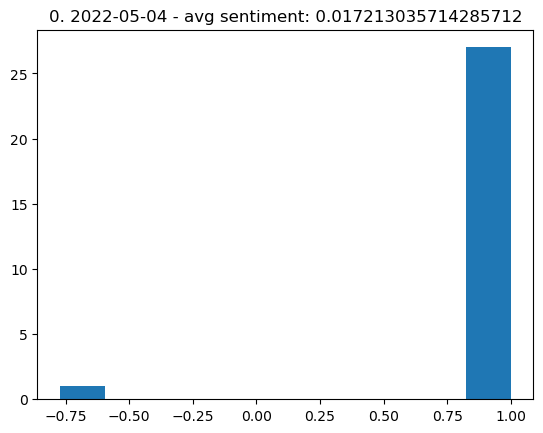

Difference in Estimated and Actual Earnings: 0.16


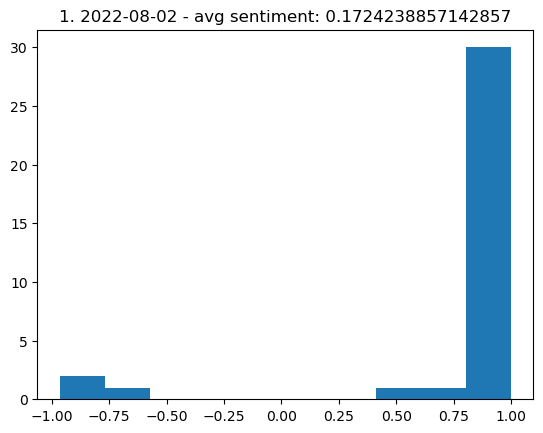

Difference in Estimated and Actual Earnings: -0.54


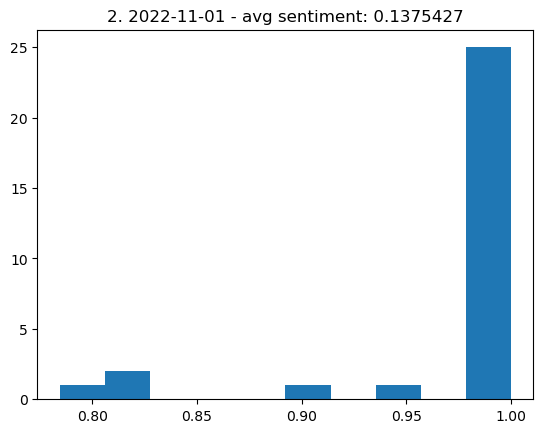

Difference in Estimated and Actual Earnings: 0.49


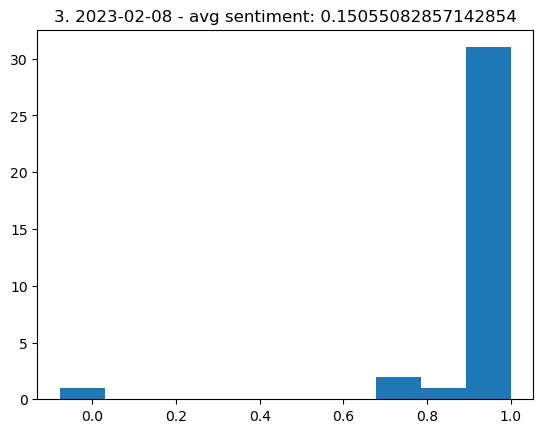

Difference in Estimated and Actual Earnings: -0.02


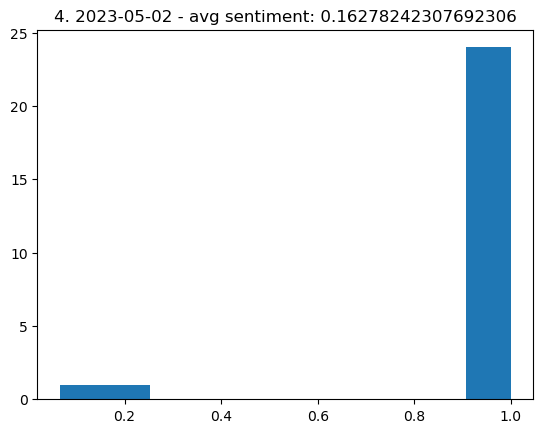

Difference in Estimated and Actual Earnings: 0.19


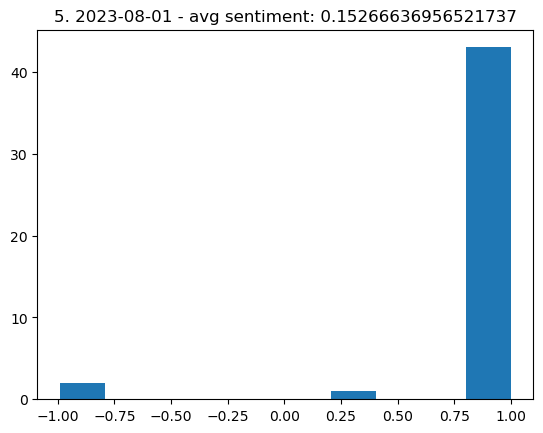

Difference in Estimated and Actual Earnings: 0.01


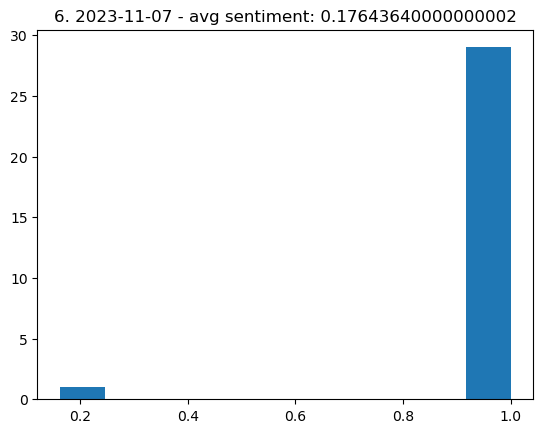

Difference in Estimated and Actual Earnings: 0.47


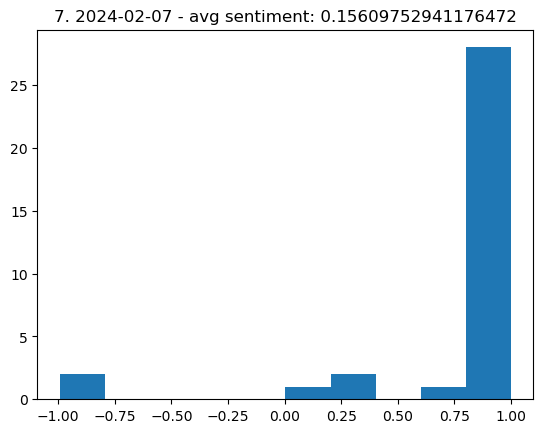

Difference in Estimated and Actual Earnings: -0.39


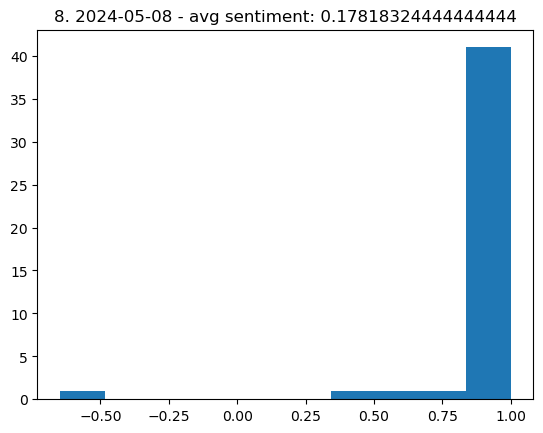

Difference in Estimated and Actual Earnings: -1.07


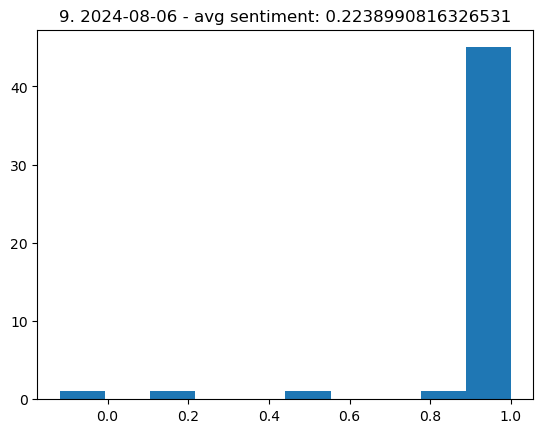

Difference in Estimated and Actual Earnings: 0.06


In [296]:
hist_ticker_sentiment(articles_df, earnings_df, 'UBER')

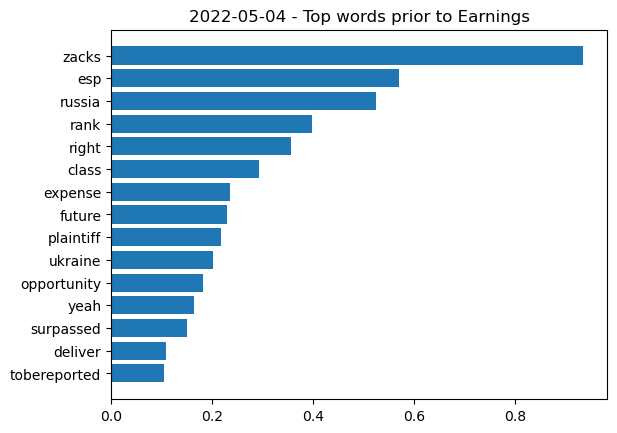

Difference in Estimated and Actual Earnings: 0.16


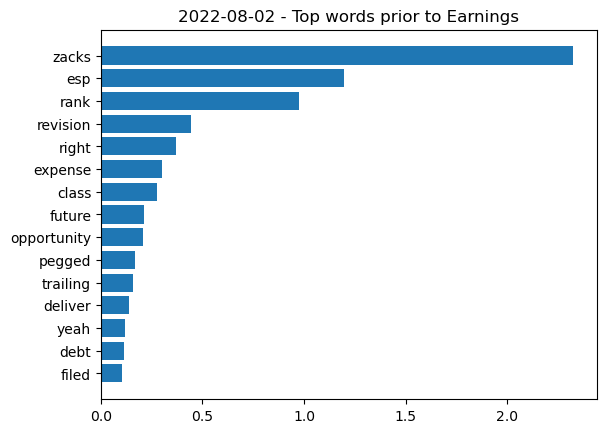

Difference in Estimated and Actual Earnings: -0.54


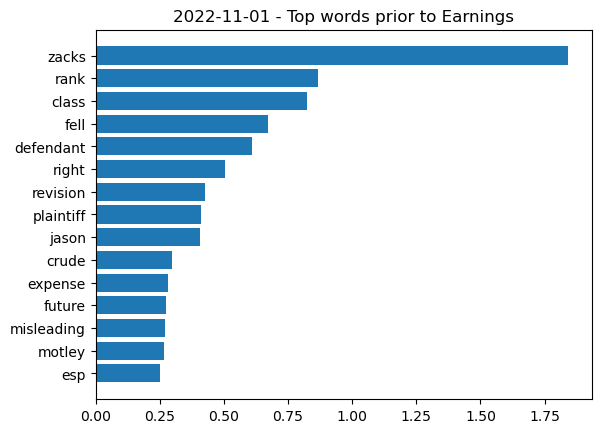

Difference in Estimated and Actual Earnings: 0.49


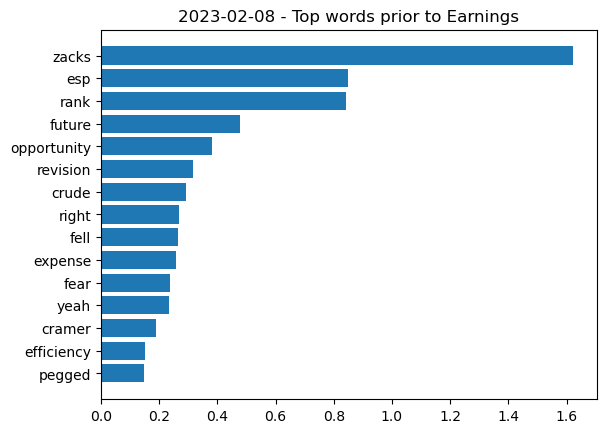

Difference in Estimated and Actual Earnings: -0.02


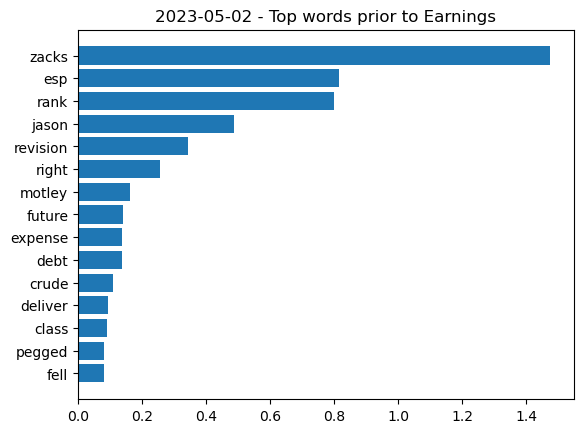

Difference in Estimated and Actual Earnings: 0.19


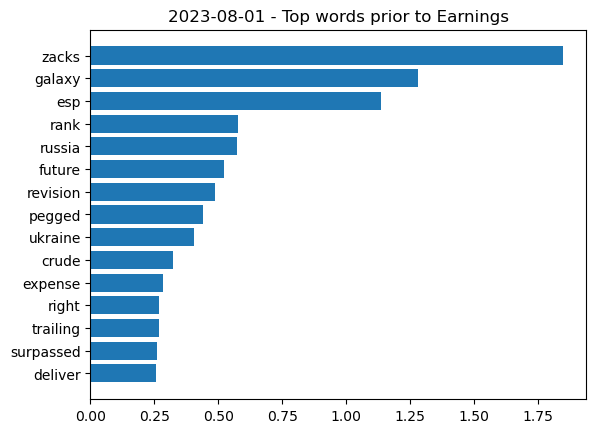

Difference in Estimated and Actual Earnings: 0.01


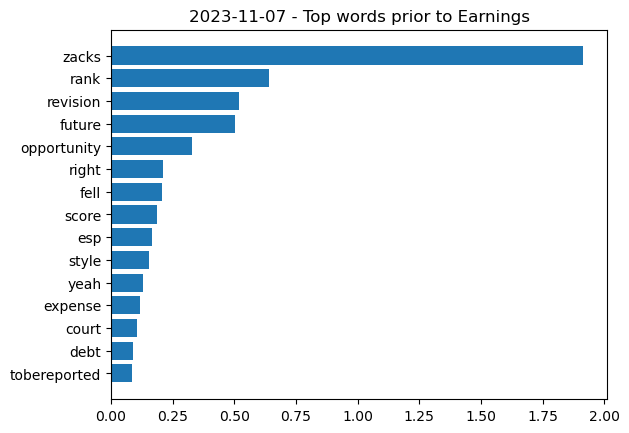

Difference in Estimated and Actual Earnings: 0.47


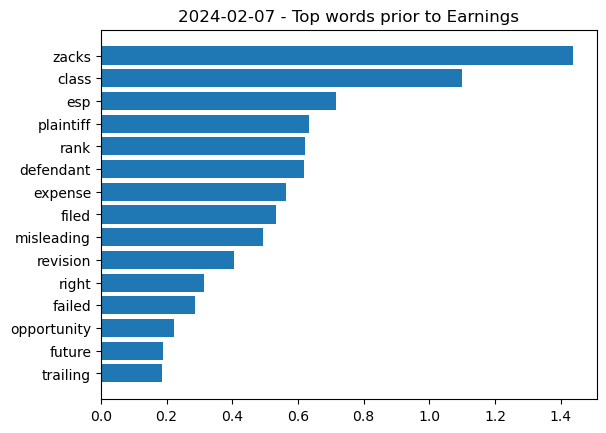

Difference in Estimated and Actual Earnings: -0.39


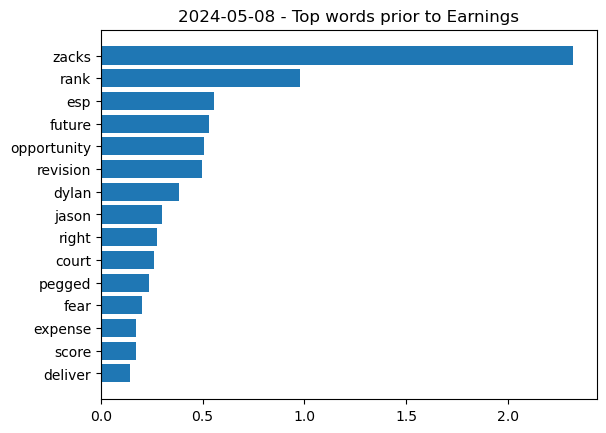

Difference in Estimated and Actual Earnings: -1.07


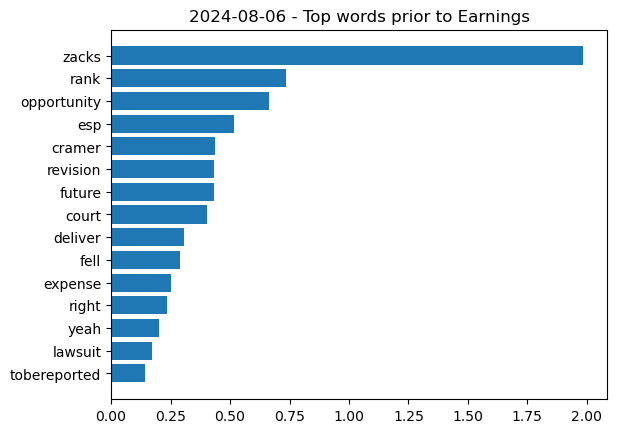

Difference in Estimated and Actual Earnings: 0.06


,esp,trailing,deliver,rank,zacks,jason,motley,galaxy,tobereported,revision,...,plaintiff,cramer,lawsuit,falcon,failed,crude,russia,defendant,misleading,fear


In [295]:
barchart_top_words(articles_df, earnings_df, tfidf_df, 'UBER')

0   2024-08-06
1   2024-05-08
2   2024-02-07
3   2023-11-07
4   2023-08-01
5   2023-05-02
6   2023-02-08
7   2022-11-01
8   2022-08-02
9   2022-05-04
Name: reportedDate, dtype: datetime64[ns]
(1, 31)


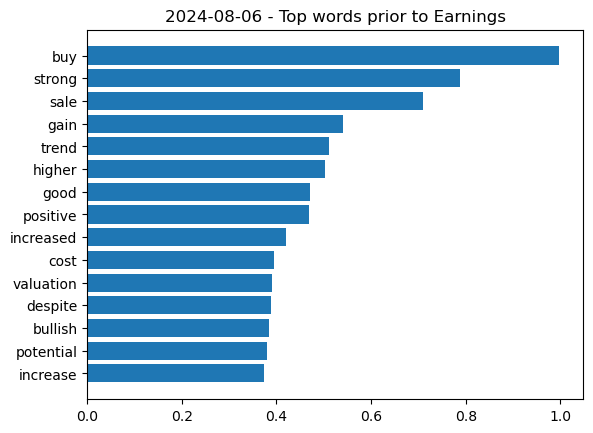

Difference in Estimated and Actual Earnings: 0.16
(1, 31)


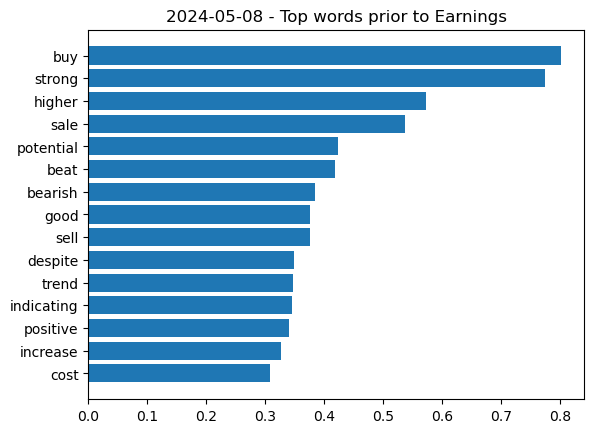

Difference in Estimated and Actual Earnings: -0.54
(1, 31)


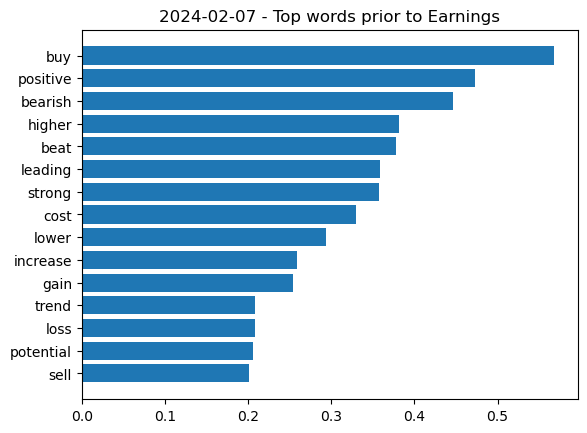

Difference in Estimated and Actual Earnings: 0.49
(1, 31)


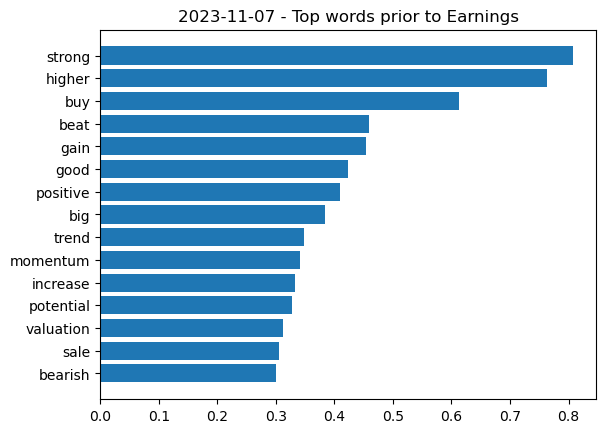

Difference in Estimated and Actual Earnings: -0.02
(1, 31)


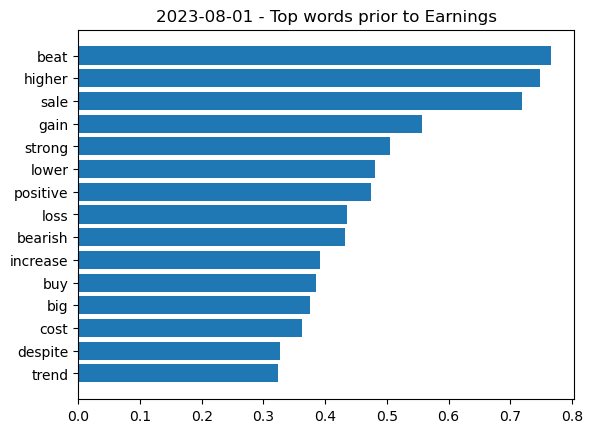

Difference in Estimated and Actual Earnings: 0.19
(1, 31)


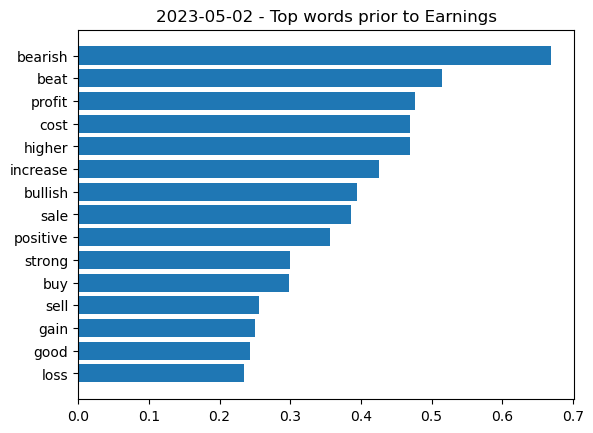

Difference in Estimated and Actual Earnings: 0.01
(1, 31)


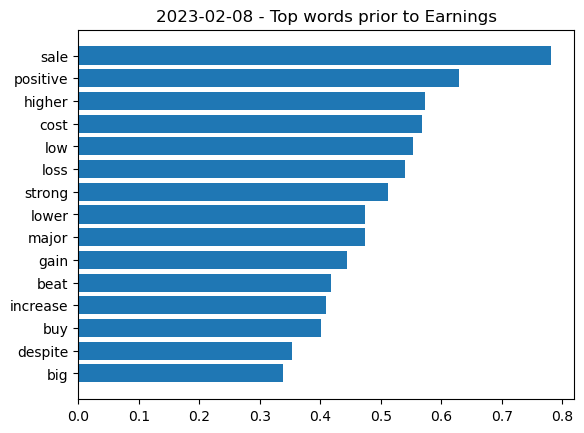

Difference in Estimated and Actual Earnings: 0.47
(1, 31)


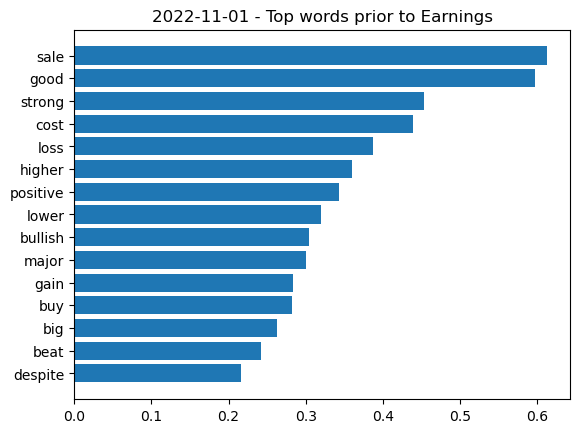

Difference in Estimated and Actual Earnings: -0.39
(1, 31)


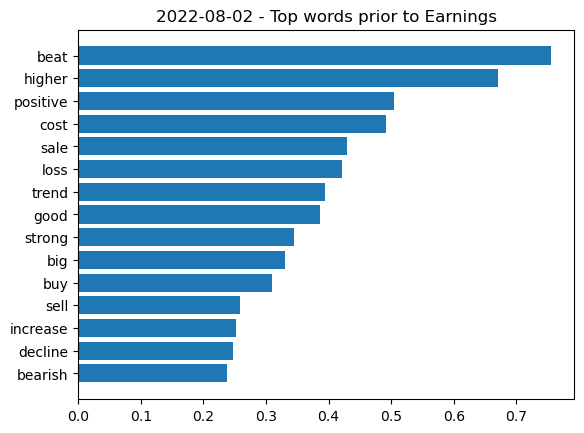

Difference in Estimated and Actual Earnings: -1.07
(1, 31)


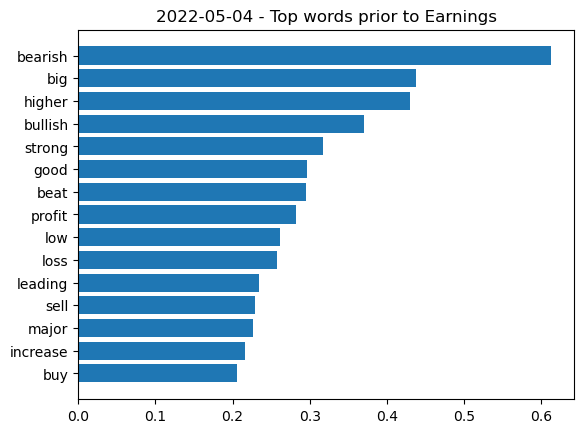

Difference in Estimated and Actual Earnings: 0.06


In [187]:
test = bar_top_words(articles_df, earnings_df, key_words_mat, 'UBER')

In [190]:
test

,buy,sale,strong,beat,higher,increase,positive,gain,lower,trend,...,rising,grow,rise,solution,bad,worse,negative,poor,ticker,date
score,0.998168,0.708983,0.787217,0.291428,0.503385,0.372752,0.467904,0.539888,0.318487,0.511524,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UBER,2024-08-06
score,0.800439,0.537304,0.773395,0.417892,0.572789,0.327195,0.339302,0.248271,0.254346,0.347217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UBER,2024-05-08
score,0.568051,0.090328,0.357649,0.377986,0.381648,0.258469,0.473139,0.253528,0.293999,0.208937,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UBER,2024-02-07
score,0.613588,0.304676,0.806961,0.459103,0.763054,0.332646,0.409084,0.454372,0.129301,0.347707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UBER,2023-11-07
score,0.385911,0.718074,0.504352,0.765097,0.747400,0.391873,0.473558,0.556347,0.481035,0.323816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UBER,2023-08-01
score,0.298051,0.386317,0.299945,0.514626,0.469611,0.425926,0.356781,0.250677,0.218257,0.114077,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UBER,2023-05-02
score,0.400448,0.780753,0.511708,0.418524,0.573561,0.409211,0.629303,0.443555,0.473923,0.180416,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UBER,2023-02-08
score,0.282151,0.612052,0.452584,0.241523,0.359913,0.184104,0.342579,0.283477,0.320338,0.201148,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UBER,2022-11-01
score,0.309189,0.429627,0.344784,0.754528,0.670721,0.252042,0.504600,0.232633,0.197270,0.394559,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UBER,2022-08-02
score,0.205624,0.193231,0.316764,0.295749,0.429771,0.216373,0.196693,0.084622,0.105871,0.137751,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UBER,2022-05-04


In [130]:
negative_earnings = earnings_df[earnings_df['surprise'] < 0]

In [49]:
new_earnings_df = pd.DataFrame()

In [52]:
for ticker in tech_company_tickers:
    new_df = bar_top_words(articles_df, earnings_df, key_words_mat, ticker)
    new_earnings_df = pd.concat([new_earnings_df, new_df])

In [53]:
new_earnings_df.reset_index(drop=True)

,esp,trailing,deliver,rank,zacks,jason,motley,galaxy,tobereported,revision,...,falcon,failed,crude,russia,defendant,misleading,fear,ticker,date,sentiment
0,3.610702,1.136323,0.295457,3.823219,8.749320,0.052722,0.000000,0.000000,1.377807,0.278167,...,0.000000,0.027443,0.096838,0.000000,0.0,0.000000,0.164293,AAPL,2024-08-01,0.908269
1,0.562945,0.713053,0.196719,1.032569,2.884505,0.137658,0.145703,0.170355,0.259732,0.973827,...,0.000000,0.106349,0.000000,0.131877,0.0,0.000000,0.861961,AAPL,2024-05-02,0.884771
2,1.394501,0.356937,0.302218,1.247928,2.893719,0.000000,0.000000,0.063538,0.608914,0.432651,...,0.000000,0.167748,0.181732,0.056406,0.0,0.038295,0.107859,AAPL,2024-02-01,0.919484
3,0.119400,0.288690,0.180050,0.375850,1.269790,0.000000,0.102661,0.109231,0.123041,0.208668,...,0.000000,0.092198,0.167560,0.000000,0.0,0.000000,0.035828,AAPL,2023-11-02,0.827998
4,0.936423,0.282177,0.201403,0.812914,2.145641,0.000000,0.000000,0.000000,0.263772,0.191447,...,0.000000,0.051660,0.184828,0.000000,0.0,0.000000,0.132349,AAPL,2023-08-03,0.885762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,0.177841,0.164962,0.074916,1.542757,3.135712,0.339563,0.047405,0.000000,0.034338,0.650626,...,0.461665,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,CRWD,2023-05-31,0.984262
274,2.123670,0.491346,0.138018,1.641691,3.470350,0.260412,0.264202,0.000000,0.425731,0.393480,...,0.323290,0.000000,0.000000,0.092350,0.0,0.000000,0.126301,CRWD,2023-03-07,0.939176
275,0.521941,0.056621,0.199784,0.526207,1.076758,0.208581,0.178691,0.000000,0.035013,0.300447,...,0.252707,0.000000,0.000000,0.000000,0.0,0.000000,0.083564,CRWD,2022-11-29,0.933885
276,0.173400,0.215756,0.025614,0.418129,1.041973,0.000000,0.058482,0.000000,0.033480,0.262377,...,0.181891,0.063022,0.031947,0.067675,0.0,0.000000,0.342995,CRWD,2022-08-30,0.909565


In [54]:
new_earnings_df.shape

(278, 42)

In [63]:
earnings_df['date'] = earnings_df['reportedDate'].apply(lambda x: x.date())

In [64]:
earnings_df.sort_values(['ticker', 'date'], inplace=True)

In [71]:
earnings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 9 to 0
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   fiscalDateEnding    278 non-null    object        
 1   reportedDate        278 non-null    datetime64[ns]
 2   reportedEPS         278 non-null    float64       
 3   estimatedEPS        278 non-null    float64       
 4   surprise            278 non-null    float64       
 5   surprisePercentage  278 non-null    float64       
 6   reportTime          278 non-null    object        
 7   ticker              278 non-null    object        
 8   lastDateFormatted   278 non-null    object        
 9   firstDateFormatted  278 non-null    object        
 10  result              278 non-null    int64         
 11  date                278 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 28.2+ KB


In [65]:
new_earnings_df.sort_values(['ticker', 'date'], inplace=True)

In [70]:
new_earnings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, score to score
Data columns (total 42 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   esp           278 non-null    float64
 1   trailing      278 non-null    float64
 2   deliver       278 non-null    float64
 3   rank          278 non-null    float64
 4   zacks         278 non-null    float64
 5   jason         278 non-null    float64
 6   motley        278 non-null    float64
 7   galaxy        278 non-null    float64
 8   tobereported  278 non-null    float64
 9   revision      278 non-null    float64
 10  dylan         278 non-null    float64
 11  expense       278 non-null    float64
 12  yeah          278 non-null    float64
 13  score         278 non-null    float64
 14  style         278 non-null    float64
 15  efficiency    278 non-null    float64
 16  surpassed     278 non-null    float64
 17  opportunity   278 non-null    float64
 18  pegged        278 non-null   

In [68]:
new_earnings_df['date'] = new_earnings_df['date'].apply(lambda x: x.date())

AttributeError: 'datetime.date' object has no attribute 'date'

In [384]:
# new_earnings_df.info()

In [61]:
# earnings_df.info()

In [72]:
merged_df = new_earnings_df.merge(earnings_df, how='inner', on = ['ticker', 'date'])

In [73]:
merged_df.drop(columns=['estimatedEPS', 'reportedEPS', 'surprisePercentage', 'lastDateFormatted', 
                        'firstDateFormatted', 'fiscalDateEnding'], inplace=True)

In [74]:
merged_df.drop(columns=['sentiment'], inplace=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   esp           278 non-null    float64       
 1   trailing      278 non-null    float64       
 2   deliver       278 non-null    float64       
 3   rank          278 non-null    float64       
 4   zacks         278 non-null    float64       
 5   jason         278 non-null    float64       
 6   motley        278 non-null    float64       
 7   galaxy        278 non-null    float64       
 8   tobereported  278 non-null    float64       
 9   revision      278 non-null    float64       
 10  dylan         278 non-null    float64       
 11  expense       278 non-null    float64       
 12  yeah          278 non-null    float64       
 13  score         278 non-null    float64       
 14  style         278 non-null    float64       
 15  efficiency    278 non-null    float64   

In [75]:
merged_df.dropna(inplace=True)
merged_df['month'] = merged_df['reportedDate'].apply(lambda x: x.month)

In [76]:
neg_earnigns = merged_df[merged_df['surprise'] < 0]['surprise'].count()
pos_earnings = merged_df[merged_df['surprise'] >= 0]['surprise'].count()
print(f'Earnings reported less than estimate: {neg_earnigns}')
print(f'Earnings reported greater or exact estimate: {pos_earnings}')

Earnings reported less than estimate: 38
Earnings reported greater or exact estimate: 240


In [77]:
merged_df['result'] = merged_df['surprise'].apply(lambda x: 1 if x >= 0 else 0)

In [78]:
def create_df(df, tickers):
    res_df = pd.DataFrame()
    for ticker in tickers:
        new_df = bar_top_words(articles_df, earnings_df, df, ticker)
        res_df = pd.concat([res_df, new_df])
    res_df = res_df.sort_values(by=['ticker', 'date'])
    res_df['date'] = res_df['date'].apply(lambda x: x.date())
    res_df['month'] = res_df['date'].apply(lambda x: x.month)
    merged_df = res_df.merge(earnings_df, how='inner', on=['ticker', 'date'])
    merged_df['result'] = merged_df['surprise'].apply(lambda x: 1 if x >= 0 else 0)
    return merged_df
    

In [79]:
new_earnings_df_count = pd.DataFrame()

In [80]:
for ticker in tech_company_tickers:
    new_df = bar_top_words(articles_df, earnings_df, key_words_count, ticker)
    new_earnings_df_count = pd.concat([new_earnings_df_count, new_df])

In [81]:
# new_earnings_df_count.info()
new_earnings_df_count = new_earnings_df_count.sort_values(by=['ticker', 'date'])
new_earnings_df_count['date'] = new_earnings_df_count['date'].apply(lambda x: x.date())
# new_earnings_df_count.info()

In [82]:
merged_count_df = new_earnings_df_count.merge(earnings_df, how='inner', on=['ticker', 'date'])

In [83]:
merged_count_df.drop(columns=['estimatedEPS', 'reportedEPS', 'surprisePercentage', 'lastDateFormatted', 
                        'firstDateFormatted', 'fiscalDateEnding', 'sentiment'], inplace=True)

In [84]:
merged_count_df.dropna(inplace=True)
merged_count_df['month'] = merged_count_df['reportedDate'].apply(lambda x: x.month)

In [85]:
merged_count_df.head()

,esp,trailing,deliver,rank,zacks,jason,motley,galaxy,tobereported,revision,...,defendant,misleading,fear,ticker,date,reportedDate,surprise,reportTime,result,month
0,24,18,14,48,123,1,9,0,17,8,...,0,0,10,AAPL,2022-04-28,2022-04-28,0.09,post-market,1,4
1,19,4,1,51,117,0,0,1,13,12,...,0,1,4,AAPL,2022-07-28,2022-07-28,0.04,post-market,1,7
2,45,26,11,60,183,2,0,0,16,8,...,0,0,15,AAPL,2022-10-27,2022-10-27,0.02,post-market,1,10
3,2,10,6,28,88,0,5,0,4,5,...,0,0,3,AAPL,2023-02-02,2023-02-02,-0.06,post-market,0,2
4,4,16,6,19,97,0,7,0,0,3,...,0,0,5,AAPL,2023-05-04,2023-05-04,0.09,post-market,1,5


In [90]:
merged_cols = merged_count_df.columns
merged_cols

Index(['esp', 'trailing', 'deliver', 'rank', 'zacks', 'jason', 'motley',
       'galaxy', 'tobereported', 'revision', 'dylan', 'expense', 'yeah',
       'score', 'style', 'efficiency', 'surpassed', 'opportunity', 'pegged',
       'court', 'class', 'fell', 'housing', 'future', 'filed', 'right', 'debt',
       'ukraine', 'biden', 'plaintiff', 'cramer', 'lawsuit', 'falcon',
       'failed', 'crude', 'russia', 'defendant', 'misleading', 'fear',
       'ticker', 'date', 'reportedDate', 'surprise', 'reportTime', 'result',
       'month'],
      dtype='object')

In [91]:
# merged_count_df.info()

In [92]:
int_cols = ['esp', 'trailing', 'deliver', 'rank', 'zacks', 'jason', 'motley',
       'galaxy', 'tobereported', 'revision', 'dylan', 'expense', 'yeah',
       'score', 'style', 'efficiency', 'surpassed', 'opportunity', 'pegged',
       'court', 'class', 'fell', 'housing', 'future', 'filed', 'right', 'debt',
       'ukraine', 'biden', 'plaintiff', 'cramer', 'lawsuit', 'falcon',
       'failed', 'crude', 'russia', 'defendant', 'misleading', 'fear']

In [93]:
merged_count_df[int_cols] = merged_count_df[int_cols].astype(int)

In [94]:
merged_count_df['result'] = merged_count_df['surprise'].apply(lambda x: 1 if x >= 0 else 0)

In [95]:
merged_count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 46 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   esp           278 non-null    int64         
 1   trailing      278 non-null    int64         
 2   deliver       278 non-null    int64         
 3   rank          278 non-null    int64         
 4   zacks         278 non-null    int64         
 5   jason         278 non-null    int64         
 6   motley        278 non-null    int64         
 7   galaxy        278 non-null    int64         
 8   tobereported  278 non-null    int64         
 9   revision      278 non-null    int64         
 10  dylan         278 non-null    int64         
 11  expense       278 non-null    int64         
 12  yeah          278 non-null    int64         
 13  score         278 non-null    int64         
 14  style         278 non-null    int64         
 15  efficiency    278 non-null    int64     

<h2> Classification Modeling - TFIDF

In [103]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score

In [97]:
X = merged_df.drop(columns=['result', 'reportTime', 'surprise', 'reportedDate', 'date'])
X = pd.get_dummies(X, columns=['ticker'], drop_first=True)
y = merged_df['result']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=48)

In [99]:
rf_model1 = RandomForestClassifier()
rf_model1.fit(X_train, y_train)
y_pred5 = rf_model1.predict(X_test)

In [104]:
accuracy = balanced_accuracy_score(y_test, y_pred5)

In [105]:
print(accuracy)

0.5


In [102]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.83      1.00      0.91        70

    accuracy                           0.83        84
   macro avg       0.42      0.50      0.45        84
weighted avg       0.69      0.83      0.76        84



/Users/matthewelmajian/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matthewelmajian/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matthewelmajian/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

<h3> Grid Search

In [106]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
}

In [107]:
rf_model = RandomForestClassifier(random_state=47)

In [108]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='balanced_accuracy')

In [109]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=47),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='balanced_accuracy')

In [110]:
best_rf_model = grid_search.best_estimator_
print(best_rf_model)
print(grid_search.best_params_)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=10,
                       min_samples_split=5, n_estimators=50, random_state=47)
{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


<h2> Random Forest 

In [111]:
rf_model2 = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, max_depth = 10,
                                   n_estimators=50, min_samples_split=5, bootstrap=False)
rf_model2.fit(X_train, y_train)


RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=10,
                       min_samples_split=5, n_estimators=50)

In [112]:
y_pred1 = rf_model2.predict(X_test)

In [114]:
accuracy = balanced_accuracy_score(y_test, y_pred1)
print(accuracy)

0.5


In [115]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.83      1.00      0.91        70

    accuracy                           0.83        84
   macro avg       0.42      0.50      0.45        84
weighted avg       0.69      0.83      0.76        84



/Users/matthewelmajian/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matthewelmajian/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matthewelmajian/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [116]:
importances = rf_model2.feature_importances_
feature_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_df = feature_df.sort_values(by='importance', ascending=False).head(15)
feature_df

,feature,importance
1,trailing,0.079430
3,rank,0.061266
15,efficiency,0.053591
17,opportunity,0.049968
4,zacks,0.039492
0,esp,0.039196
25,right,0.033716
30,cramer,0.033401
38,fear,0.033159
23,future,0.030508


<h2> Modeling with CountVectorizer

In [117]:
X_count = merged_count_df.drop(columns=['result', 'reportTime', 'surprise', 'reportedDate', 'date'])
X_count = pd.get_dummies(X_count, columns=['ticker'], drop_first=True, dtype=int)
y_count = merged_count_df['result']

In [118]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_count, y_count, random_state =50, test_size=.30)

In [ ]:
#criterion='entropy', max_depth=30, min_samples_split=10, n_estimators=50

In [119]:
rf_model3 = RandomForestClassifier()
rf_model3.fit(X_train1, y_train1)
y_pred_count = rf_model3.predict(X_test1)

In [120]:
accuracy_count = balanced_accuracy_score(y_test1, y_pred_count)


In [121]:
print(accuracy_count)

0.4864864864864865


In [122]:
print(classification_report(y_test1, y_pred_count))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.88      0.97      0.92        74

    accuracy                           0.86        84
   macro avg       0.44      0.49      0.46        84
weighted avg       0.77      0.86      0.81        84



In [123]:
importances = rf_model3.feature_importances_
feature_df = pd.DataFrame({'feature': X_count.columns, 'importance': importances})
feature_df = feature_df.sort_values(by='importance', ascending=False).head(15)
feature_df

,feature,importance
0,esp,0.053090
25,right,0.043547
4,zacks,0.039584
3,rank,0.036702
1,trailing,0.035499
17,opportunity,0.033227
20,class,0.033216
9,revision,0.033211
21,fell,0.032766
23,future,0.032733


In [124]:
rf_model4 = RandomForestClassifier()
g_search = GridSearchCV(estimator=rf_model4, param_grid=param_grid, cv=5, n_jobs=-1,
                        scoring='balanced_accuracy')

In [125]:
g_search.fit(X_train1, y_train1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='balanced_accuracy')

In [126]:
best_rf_model = g_search.best_estimator_
print(best_rf_model)
print(grid_search.best_params_)

RandomForestClassifier(bootstrap=False, max_depth=10)
{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [127]:
rf_model5 = RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=50, min_samples_leaf=1,
                                  min_samples_split=5, bootstrap=False)

In [128]:
rf_model5.fit(X_train1, y_train1)
model5_pred = rf_model5.predict(X_test1)

In [129]:
accuracy_5 = balanced_accuracy_score(y_test1, model5_pred)
print(accuracy_5)
print(classification_report(y_test1, model5_pred))

0.49324324324324326
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.88      0.99      0.93        74

    accuracy                           0.87        84
   macro avg       0.44      0.49      0.46        84
weighted avg       0.77      0.87      0.82        84



<h1> Word Analysis

In [289]:
tfidf_positive_earn = merged_df[merged_df['result'] == 1]
top_10_tfidf = tfidf_positive_earn[key_words].mean()[:10].sort_values()
top_10_tfidf.values

array([0.03133979, 0.03818391, 0.04009324, 0.1155852 , 0.16380191,
       0.20685994, 0.33753812, 0.81994546, 0.99013001, 2.06108965])

Text(0, 0.5, 'Word')

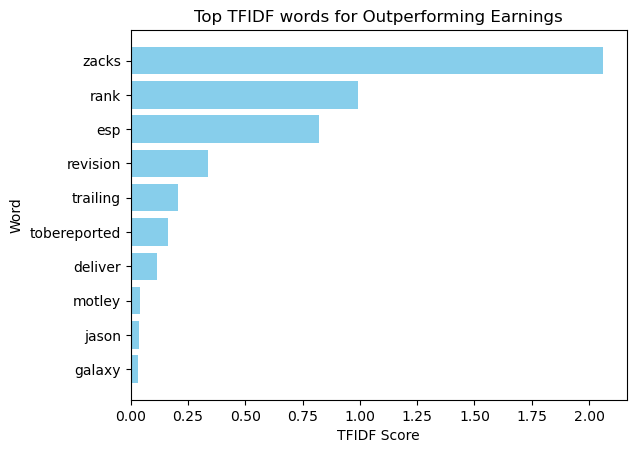

In [290]:
plt.barh(top_10_tfidf.index, top_10_tfidf.values, color='skyblue')
plt.title('Top TFIDF words for Outperforming Earnings')
plt.xlabel('TFIDF Score')
plt.ylabel('Word')

In [293]:
tfidf_neg_earn = merged_df[merged_df['result'] == 0]
top_10_tfidf_neg = tfidf_neg_earn[key_words].mean().sort_values(ascending=False)[:10]
top_10_tfidf_neg.values

array([1.09309974, 0.46243301, 0.3707926 , 0.36519521, 0.34884459,
       0.26906863, 0.2689729 , 0.2206596 , 0.18723814, 0.1857451 ])

Text(0, 0.5, 'Word')

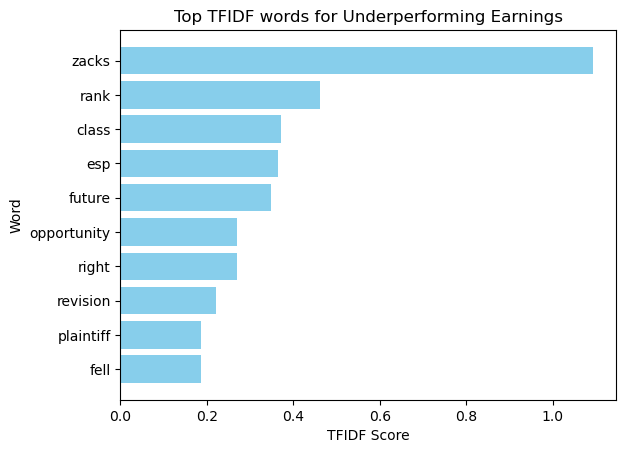

In [294]:
plt.barh(top_10_tfidf_neg.index, top_10_tfidf_neg.values, color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top TFIDF words for Underperforming Earnings')
plt.xlabel('TFIDF Score')
plt.ylabel('Word')

In [839]:
count_positive_earn = merged_count_df[merged_count_df['result'] ==1]
top_10_count = count_positive_earn[key_words].sum()[:10]

In [840]:
count_negative_earn = merged_count_df[merged_count_df['result'] == 0]
top_10_count_neg = count_negative_earn[key_words].sum().sort_values(ascending=False)[:10]

Text(0, 0.5, 'Word')

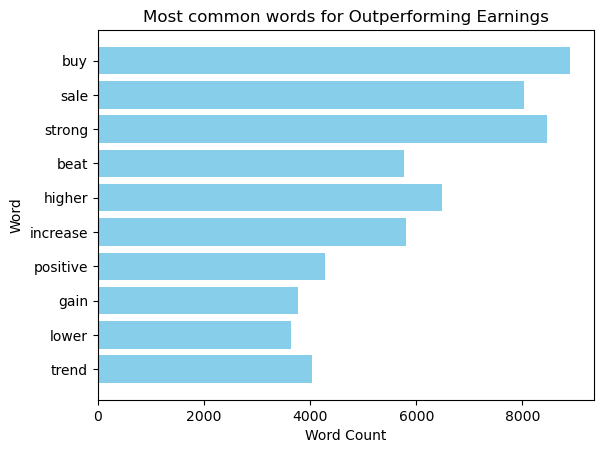

In [841]:
plt.barh(top_10_count.index, top_10_count.values, color='skyblue')
plt.gca().invert_yaxis()
plt.title('Most common words for Outperforming Earnings')
plt.xlabel('Word Count')
plt.ylabel('Word')

Text(0, 0.5, 'Word')

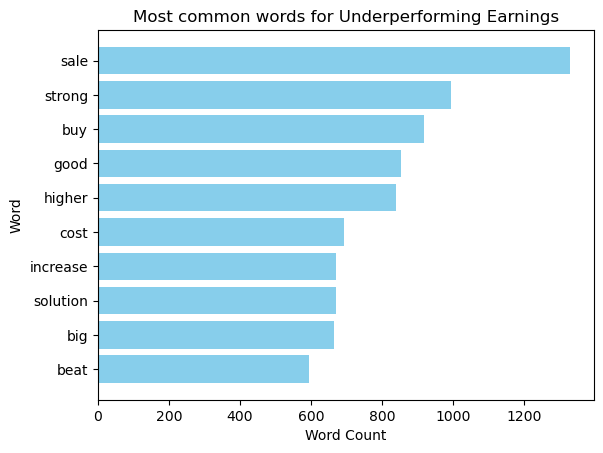

In [843]:
plt.barh(top_10_count_neg.index, top_10_count_neg.values, color='skyblue')
plt.gca().invert_yaxis()
plt.title('Most common words for Underperforming Earnings')
plt.xlabel('Word Count')
plt.ylabel('Word')

In [130]:
count_df_new = create_df(key_words_count, tech_company_tickers)
count_df_new.dropna(inplace=True)

In [131]:
tfidf_df_new = create_df(key_words_mat, tech_company_tickers)

In [132]:
tfidf_df_new.dropna(inplace=True)

In [133]:
tfidf_df_pos_sent = tfidf_df_new[tfidf_df_new['sentiment'] > 0]
tfidf_df_neg_sent = tfidf_df_new[tfidf_df_new['sentiment'] < 0]

<h2> Models with Sentiment

In [134]:
columns_to_drop = ['date', 'fiscalDateEnding', 'reportedDate', 'reportedEPS', 'estimatedEPS', 
                   'surprise', 'surprisePercentage', 'reportTime', 'lastDateFormatted',
                   'firstDateFormatted', 'result']
columns_to_drop2 = ['date', 'fiscalDateEnding', 'reportedDate', 'reportedEPS', 'estimatedEPS', 
                   'surprise', 'surprisePercentage', 'reportTime', 'lastDateFormatted',
                   'firstDateFormatted', 'result', 'sentiment']

In [135]:
X = tfidf_df_new.drop(columns=columns_to_drop)
X = pd.get_dummies(X, columns=['ticker'], drop_first=True, dtype=int)
y = tfidf_df_new['result']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=3)

In [137]:
rand_rf_model = RandomForestClassifier(n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_depth=50, bootstrap=True)

In [138]:
rand_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, n_estimators=50)

In [139]:
rand_y_pred = rand_rf_model.predict(X_test)

In [140]:
print(balanced_accuracy_score(y_test, rand_y_pred))

0.5314192849404117


In [141]:
print(classification_report(y_test, rand_y_pred))

              precision    recall  f1-score   support

           0       0.50      0.08      0.13        13
           1       0.85      0.99      0.92        71

    accuracy                           0.85        84
   macro avg       0.68      0.53      0.52        84
weighted avg       0.80      0.85      0.79        84



<h2> Random Search

In [142]:
rf = RandomForestClassifier()
param_dist = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [143]:
random_search = RandomizedSearchCV(
    estimator=rf,            # Model to tune
    param_distributions=param_dist,  # Hyperparameter grid
    n_iter=10,               # Number of parameter settings to sample
    scoring='balanced_accuracy',      # Metric to optimize
    cv=5,
    n_jobs=-1                # Use all available cores
)

In [144]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500]},
                   scoring='balanced_accuracy')

In [145]:
print(f'best parameters found: {random_search.best_params_}')
print(f'best accuracy score: {random_search.best_score_}')

best parameters found: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': False}
best accuracy score: 0.5510873440285204


In [148]:
rand_rf_model = RandomForestClassifier(n_estimators=200, min_samples_split=2, 
                                       min_samples_leaf=1, max_depth=50, bootstrap=False)

In [149]:
rand_rf_model.fit(X_train, y_train)
rand_y_pred = rand_rf_model.predict(X_test)

In [150]:
print(balanced_accuracy_score(y_test, rand_y_pred))


0.5314192849404117


In [151]:
print(classification_report(y_test, rand_y_pred))

              precision    recall  f1-score   support

           0       0.50      0.08      0.13        13
           1       0.85      0.99      0.92        71

    accuracy                           0.85        84
   macro avg       0.68      0.53      0.52        84
weighted avg       0.80      0.85      0.79        84



<h2> Random with Count with Sentiment

In [152]:
X = count_df_new.drop(columns=columns_to_drop)
X = pd.get_dummies(X, columns=['ticker'], drop_first=True, dtype=int)
y = count_df_new['result']

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=5)

In [156]:
rf = RandomForestClassifier()
param_dist = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [157]:
random_search = RandomizedSearchCV(
    estimator=rf,            # Model to tune
    param_distributions=param_dist,  # Hyperparameter grid
    n_iter=10,               # Number of parameter settings to sample
    scoring='balanced_accuracy',      # Metric to optimize
    cv=5,                    # 5-fold cross-validation
    random_state=42,         # Reproducibility
    n_jobs=-1                # Use all available cores
)

In [158]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=42, scoring='balanced_accuracy')

In [159]:
print(f'best parameters found: {random_search.best_params_}')
print(f'best accuracy score: {random_search.best_score_}')

best parameters found: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': None, 'bootstrap': True}
best accuracy score: 0.5


In [160]:
rf_model = RandomForestClassifier(n_estimators=200, min_samples_split=5, 
                                  min_samples_leaf=4, max_depth=None, bootstrap=True)

In [161]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [162]:
y_pred = rf_model.predict(X_test)

In [163]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.87      1.00      0.93        73

    accuracy                           0.87        84
   macro avg       0.43      0.50      0.46        84
weighted avg       0.76      0.87      0.81        84



/Users/matthewelmajian/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matthewelmajian/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matthewelmajian/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

<h1> Support Vector Machine - with Count & Sentiment

In [164]:
from sklearn.svm import SVC

In [165]:
X = count_df_new.drop(columns=columns_to_drop)
X = pd.get_dummies(X, columns=['ticker'], drop_first=True, dtype=int)
y = count_df_new['result']

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=5)

In [168]:
param_grid = {'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly']}

In [169]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='balanced_accuracy')

In [170]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='balanced_accuracy')

In [171]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation recall:", grid_search.best_score_)

Best parameters: {'C': 0.1, 'kernel': 'rbf'}
Best cross-validation recall: 0.5


In [172]:
svc = SVC(C=.1, kernel='rbf')

In [173]:
svc.fit(X_train, y_train)

SVC(C=0.1)

In [174]:
y_pred = svc.predict(X_test)

In [175]:
print(balanced_accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.87      1.00      0.93        73

    accuracy                           0.87        84
   macro avg       0.43      0.50      0.46        84
weighted avg       0.76      0.87      0.81        84



/Users/matthewelmajian/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matthewelmajian/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matthewelmajian/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

<h2> Support Vector Machine - with TFIDF & Sentiment

In [297]:
X = tfidf_df_new.drop(columns=columns_to_drop)
X = pd.get_dummies(X, columns=['ticker'], drop_first=True, dtype=int)
y = tfidf_df_new['result']

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=80)

In [299]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='balanced_accuracy')

In [300]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='balanced_accuracy')

In [301]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation recall:", grid_search.best_score_)

Best parameters: {'C': 100, 'kernel': 'linear'}
Best cross-validation recall: 0.5277540106951871


In [302]:
svc = SVC(C=100, kernel='rbf')

In [303]:
svc.fit(X_train, y_train)

SVC(C=100)

In [304]:
y_pred = svc.predict(X_test)

In [305]:
print(balanced_accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6852654387865655
              precision    recall  f1-score   support

           0       0.83      0.38      0.53        13
           1       0.90      0.99      0.94        71

    accuracy                           0.89        84
   macro avg       0.87      0.69      0.73        84
weighted avg       0.89      0.89      0.88        84



In [306]:
print(accuracy_score(y_test, y_pred))

0.8928571428571429


<h3> TFIDF without Sentiment

In [213]:
X = tfidf_df_new.drop(columns=columns_to_drop2)
X = pd.get_dummies(X, columns=['ticker'], drop_first=True, dtype=int)
y = tfidf_df_new['result']

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)

In [215]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='balanced_accuracy')

In [216]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='balanced_accuracy')

In [217]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation recall:", grid_search.best_score_)

Best parameters: {'C': 100, 'kernel': 'poly'}
Best cross-validation recall: 0.5209625668449197


In [218]:
svc = SVC(C=100, kernel='poly')

In [219]:
svc.fit(X_train, y_train)

SVC(C=100, kernel='poly')

In [220]:
y_pred = svc.predict(X_test)

In [221]:
print(balanced_accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.5277777777777778
              precision    recall  f1-score   support

           0       0.33      0.08      0.13        12
           1       0.86      0.97      0.92        72

    accuracy                           0.85        84
   macro avg       0.60      0.53      0.52        84
weighted avg       0.79      0.85      0.80        84



<h2> SVM - Count

<h3> With Sentiment

In [232]:
X = count_df_new.drop(columns=columns_to_drop)
X = pd.get_dummies(X, columns=['ticker'], drop_first=True, dtype=int)
y = count_df_new['result']

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=5)

In [234]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='balanced_accuracy')

In [235]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='balanced_accuracy')

In [236]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters: {'C': 0.1, 'kernel': 'rbf'}
Best cross-validation accuracy: 0.5


In [237]:
svc = SVC(C=.1, kernel='rbf')

In [238]:
svc.fit(X_train, y_train)

SVC(C=0.1)

In [239]:
y_pred = svc.predict(X_test)

In [240]:
print(balanced_accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.87      1.00      0.93        73

    accuracy                           0.87        84
   macro avg       0.43      0.50      0.46        84
weighted avg       0.76      0.87      0.81        84



/Users/matthewelmajian/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matthewelmajian/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matthewelmajian/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

<h2> without sentiment

In [241]:
X = count_df_new.drop(columns=columns_to_drop2)
X = pd.get_dummies(X, columns=['ticker'], drop_first=True, dtype=int)
y = count_df_new['result']

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=5)

In [243]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='balanced_accuracy')

In [244]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='balanced_accuracy')

In [245]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters: {'C': 0.1, 'kernel': 'rbf'}
Best cross-validation accuracy: 0.5


In [246]:
svc = SVC(C=.1, kernel='rbf')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [247]:
print(balanced_accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.87      1.00      0.93        73

    accuracy                           0.87        84
   macro avg       0.43      0.50      0.46        84
weighted avg       0.76      0.87      0.81        84



/Users/matthewelmajian/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matthewelmajian/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matthewelmajian/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)